#### Question 1 :

 On travaille dans le cadre du modèle de Black & Scholes. Dans toutes ces questions, on
 considère un call européen de maturité T et de strike K. On pourra prendre comme valeurs de référence $S_0 = 100$, $K = 100$, $T = 1$, $r = 0.05$, $σ = 0.20$.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 

In [52]:
S0 = 100
K = 100
T = 1
r = 0.05
sigma = 0.20

1. Nous allons tracer le prix du call Européen de maturité T obtenu par la formule de Black & Scholes en fonction de S0 et ce pour différentes valeurs de T.

In [53]:
def black_scholes(S0, K, T, r, sigma):
    call = []
    for el in S0:
      d1 = (np.log(el / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
      d2 = d1 - sigma * np.sqrt(T)
      call.append(el * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2))
    return call

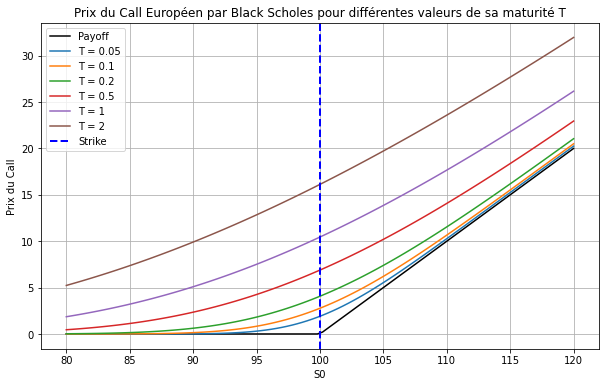

In [54]:
S0_values = np.linspace(0.8*K, 1.2*K, 100)
T_values = [0.05,0.1,0.2,0.5,1,2]
nb_plots = len(T_values)
colors = plt.get_cmap("tab10").colors
payoff = [max(S0-K,0) for S0 in S0_values]

plt.figure(figsize=(10, 6))
plt.plot(S0_values, payoff , color='k', markersize=2, label = 'Payoff')
for i in range(nb_plots):
    y = black_scholes(S0_values,K,T_values[i],r,sigma)
    plt.plot(S0_values,y, color=colors[i%len(colors)], markersize=2, label=f'T = {T_values[i]}')
plt.axvline(K, color='b', linewidth=2, linestyle='--', label = "Strike")
plt.xlabel("S0")
plt.ylabel("Prix du Call")
plt.grid()
plt.legend()
plt.title("Prix du Call Européen par Black Scholes pour différentes valeurs de sa maturité T")
plt.show()

Le graphique précédent nous permet de remarquer que la courbe du prix du Call Européen calculé par Black Scholes tend vers le payoff au fur et à mesure qu'on se rapproche de la maturité de l'option, soit au fur et à mesure que T diminue. 

Ce résultat vient du fait que le prix d'un Call par Black Scholes est donné analytiquement par la formule : 
$C_t = S_t \Phi(d_1) - Ke^{-r(T-t)} \Phi(d_2)$ avec $d_1 = \frac{ln(\frac{S_t}{K})+(r+\frac{\sigma^2}{2})(T-t)}{\sigma \sqrt{T-t}}, d_2 = d_1 - \sigma \sqrt{T-t}$. 

Alors lorsque $t \rightarrow T$, on a $\Phi(d_1) \rightarrow 1, \Phi(d_2) \rightarrow 1$ si $S_T > K$. Autrement, $S_T<K$ donne $\Phi(d_1) \rightarrow 0, \Phi(d_2) \rightarrow 0$ puisque l'option ne sera pas exercée. Autrement dit, $C_T = (S_T - K)_+$. Donc le prix du Call est bien égal au payoff à la maturité de l'option.

Maintenant, nous allons étudier le $\Delta$ du Call, soit $\frac{\partial{C}}{\partial{S}} = \Phi(d_1)$.

In [55]:
def delta_black_scholes(S0, K, T, r, sigma):
    delta = []
    for el in S0:
      d1 = (np.log(el / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
      delta.append(stats.norm.cdf(d1))
    return delta

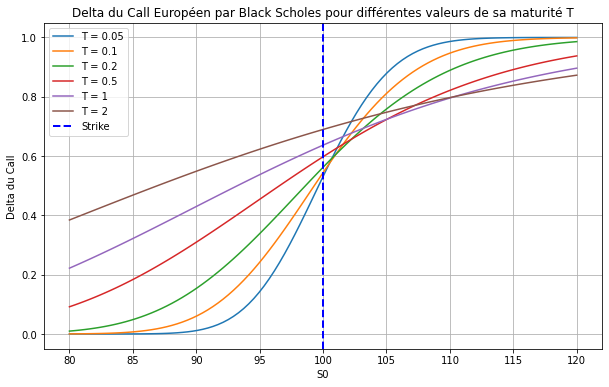

In [56]:
plt.figure(figsize=(10, 6))
for i in range(nb_plots):
    y = delta_black_scholes(S0_values,K,T_values[i],r,sigma)
    plt.plot(S0_values,y, color=colors[i%len(colors)], markersize=2, label=f'T = {T_values[i]}')
plt.axvline(K, color='b', linewidth=2, linestyle='--', label = "Strike")
plt.xlabel("S0")
plt.ylabel("Delta du Call")
plt.grid()
plt.legend()
plt.title("Delta du Call Européen par Black Scholes pour différentes valeurs de sa maturité T")
plt.show()

Dans un premier temps, nous voyons que le prix du Call est une fonction croissante du prix du sous-jacent puisque le Delta est toujours strictement supérieur à 0 (le 0 n'est pas atteint et est une limite). En effet, plus le prix du sous-jacent est élevé et plus on a de chances que le Call soit In the Money à la maturité (ITM, lorsque $S_T>K$) puisque à la maturité et ITM, $d_1$ et $d_2$ tendent tous deux vers $+\infty$ et que la probabilité d'être ITM, soit d'exercer le Call est de $\Phi(d_2)$. 

Au fur et à mesure que l'on se rapproche de la maturité, on peut constater sur le graphique ci-dessus que : 
- le delta tend vers 1 de plus en plus rapidement si l'option est ITM.
- le delta tend vers 0 de plus en plus rapidement si l'option est Out of the Money (OTM). 
- le delta change de plus en plus rapidement autour du prix d'exercice, et donc lorsque l'option est At the Money (ATM). En effet, l'option va soit passer légèrement dans la monnaie, soit légèrement hors de la monnaie. 

Enfin, nous allons étudier le $\Gamma = \frac{\partial^2{C}}{\partial{S^2}} =\frac{\Phi'(d_1)}{S\sigma \sqrt{T-t}}$. 

In [57]:
def gamma_black_scholes(S0, K, T, r, sigma):
    gamma = []
    for el in S0:
      d1 = (np.log(el / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
      gamma.append(stats.norm.pdf(d1) / (el * sigma * np.sqrt(T)))
    return gamma

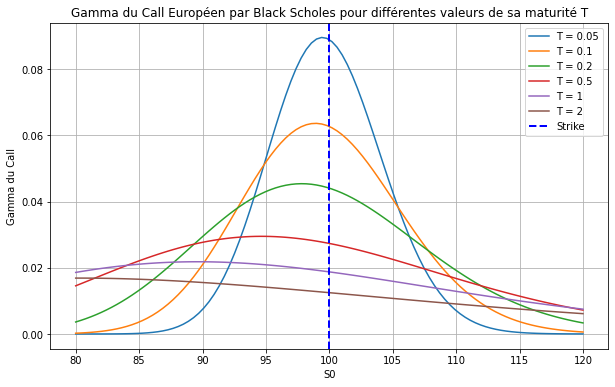

In [58]:
plt.figure(figsize=(10, 6))
for i in range(nb_plots):
    y = gamma_black_scholes(S0_values,K,T_values[i],r,sigma)
    plt.plot(S0_values,y, color=colors[i%len(colors)], markersize=2, label=f'T = {T_values[i]}')
plt.axvline(K, color='b', linewidth=2, linestyle='--', label = "Strike")
plt.xlabel("S0")
plt.ylabel("Gamma du Call")
plt.grid()
plt.legend()
plt.title("Gamma du Call Européen par Black Scholes pour différentes valeurs de sa maturité T")
plt.show()

Le Gamma peut être vu comme la sensibilité du Delta du Call aux variations de prix du sous-jacent. 

Au fur et à mesure que l'on s'approche de la maturité, le Gamma va devenir maximal pour des Call de S0 proche du strike, soit ATM. En effet, le Delta devient de plus en plus sensible aux variations du prix du sous-jacent lorsque le Call est ATM et proche de la maturité. Autrement, plus le Call est ITM ou OTM et plus le Gamma diminue (de plus en plus rapidement au fur et à mesure que l'on s'approche de l'écheance,, et en tendant vers 0 de façon positive) puisque la valeur du Delta du Call devient moins sensible aux variations de prix du sous-jacent.

2. Nous allons tracer en fonction de N (le nombre de simulations), le prix de Monte-Carlo et l'intervalle de confiance associé, en échelle logarithmique sur l'axe des abscisses. 

In [59]:
def Monte_Carlo_BS(S0, K, T, r, sigma, N, alpha=0.05):
    Z = np.random.standard_normal(N)
    S = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    discounted_payoff = np.exp(-r * T) * np.maximum(S - K, 0)
    price = np.mean(discounted_payoff)
    s_square = 1/(N-1) * np.sum([(discounted_payoff[i] - price)**2 for i in range(N)])
    largeur_intervalle = 2 * stats.norm.ppf(1-alpha/2) *np.sqrt(s_square / N)
    return price, largeur_intervalle

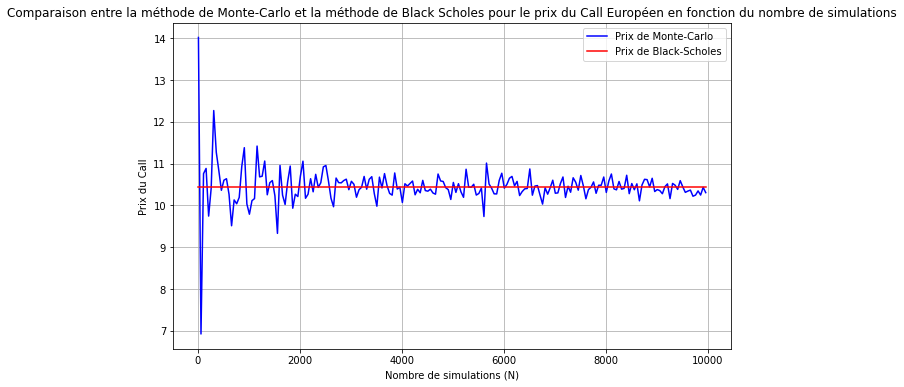

In [60]:
N = np.arange(10,10000,50)
plt.figure(figsize=(10, 6))
y=[]
y_BS = []
np.random.seed(42)
for i in range(len(N)):
    y.append(Monte_Carlo_BS(S0,K,T,r,sigma,N[i])[0])
    y_BS.append(black_scholes([S0],K,T,r,sigma))
plt.plot(N,y,'b-', markersize=2, label="Prix de Monte-Carlo")
plt.plot(N,y_BS,'r-', markersize=2, label="Prix de Black-Scholes")
plt.xlabel("Nombre de simulations (N)")
plt.ylabel("Prix du Call")
plt.legend()
plt.grid()
plt.title("Comparaison entre la méthode de Monte-Carlo et la méthode de Black Scholes pour le prix du Call Européen en fonction du nombre de simulations")
plt.show()

On remarque ainsi que le prix de Monte-Carlo tend vers le prix donné par Black Scholes au fur et à mesure qu'on augmente le nombre de simulations. Les fluctuations sont de plus en plus faibles et se rapprochent de la valeur limite. Nous allons pouvoir étudier la largeur de l'intervalle de confiance associé pour appuyer notre propos.

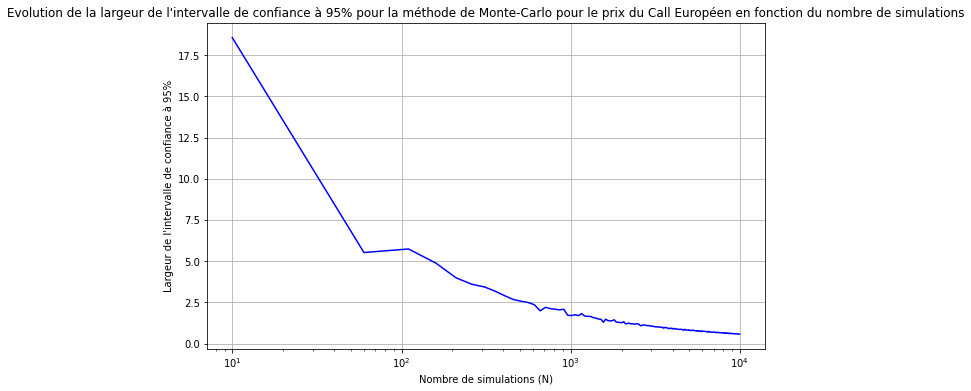

In [61]:
plt.figure(figsize=(10, 6))
confidence=[]
np.random.seed(42)
for i in range(len(N)):
    confidence.append(Monte_Carlo_BS(S0,K,T,r,sigma,N[i])[1])
plt.plot(N,confidence,'b-', markersize=2)
plt.xscale("log")
plt.xlabel("Nombre de simulations (N)")
plt.ylabel("Largeur de l'intervalle de confiance à 95%")
plt.grid()
plt.title(f"Evolution de la largeur de l'intervalle de confiance à 95% pour la méthode de Monte-Carlo pour le prix du Call Européen en fonction du nombre de simulations")
plt.show()

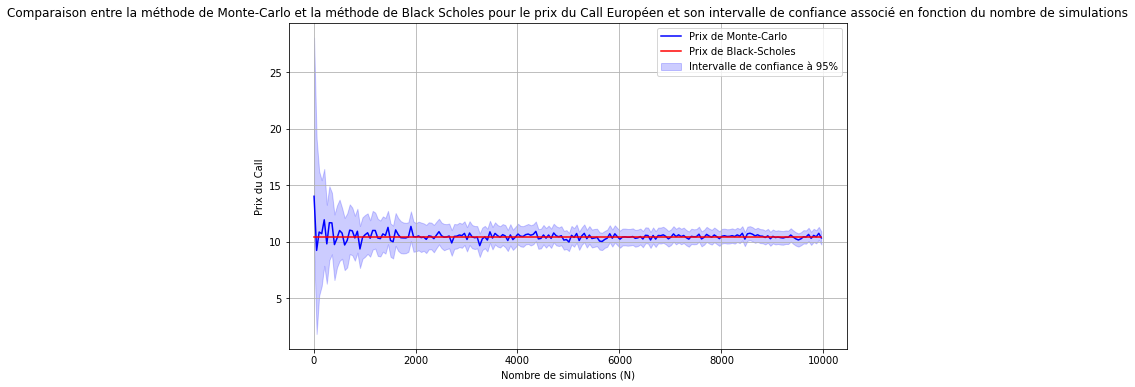

In [62]:
plt.figure(figsize=(10, 6))
y=[]
y_down = []
y_up = []
y_BS = []
np.random.seed(42)
for i in range(len(N)):
    y.append(Monte_Carlo_BS(S0,K,T,r,sigma,N[i])[0])
    y_down.append(y[i] - Monte_Carlo_BS(S0,K,T,r,sigma,N[i])[1])
    y_up.append(y[i] + Monte_Carlo_BS(S0,K,T,r,sigma,N[i])[1])
    y_BS.append(black_scholes([S0],K,T,r,sigma))
plt.plot(N,y,'b-', markersize=2, label="Prix de Monte-Carlo")
plt.plot(N,y_BS,'r-', markersize=2, label="Prix de Black-Scholes")
plt.fill_between(N, y_down, y_up, color='b', alpha=0.2, label = "Intervalle de confiance à 95%")
plt.xlabel("Nombre de simulations (N)")
plt.ylabel("Prix du Call")
plt.legend()
plt.grid()
plt.title("Comparaison entre la méthode de Monte-Carlo et la méthode de Black Scholes pour le prix du Call Européen et son intervalle de confiance associé en fonction du nombre de simulations")
plt.show()

La largeur de l'intervalle de confiance diminue et tend vers 0 au fur et à mesure que l'on augmente le nombre de simulations, ce qui confirme notre observation précédente : le prix de Monte Carlo tend vers le prix de Black Scholes de plus en plus précisement.

In [66]:
target_relative_error = 0.001  # 0.1%

bs_price = black_scholes([S0], K, T, r, sigma)[0]
nb = 10
relative_error = 1
np.random.seed(42)
while relative_error > target_relative_error:
    mc_price = Monte_Carlo_BS(S0, K, T, r, sigma, nb)[0]
    relative_error = abs(mc_price-bs_price)/bs_price
    nb += 1

print(f"N = {nb} donne une erreur relative de {relative_error*100:.4f} %")

N = 157 donne une erreur relative de 0.0325 %


Ainsi, à partir de N = 157, on obtient une erreur relative pour le prix de Monte Carlo inférieure à 0,1% et plus précisement égale à 0,0325%.

3. Pour un N fixé, nous allons maintenant simuler 100 prix de Monte Carlo et calculer l'écart-type $\hat{\sigma}_N$ de ces prix. 

In [73]:
N = 1000
multiple_simulations = []
np.random.seed(42)
nb_prix = 100
for i in range(nb_prix):
    multiple_simulations.append(Monte_Carlo_BS(S0,K,T,r,sigma,N)[0])

In [74]:
standard_deviation = np.std(multiple_simulations)
print("L'écart-type de ces prix est :",standard_deviation)

L'écart-type de ces prix est : 0.4885106958252135


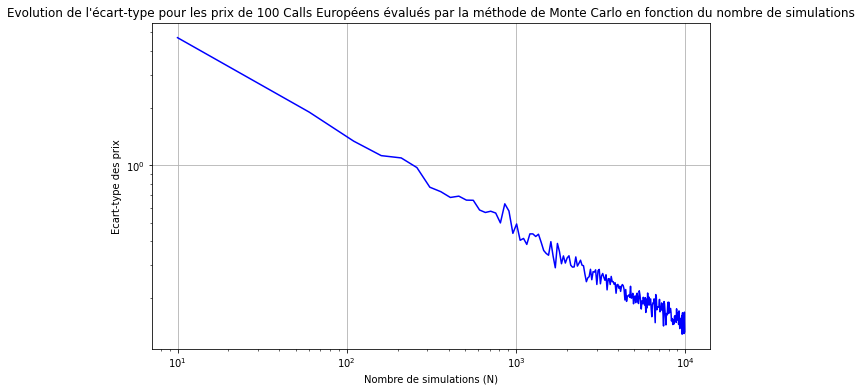

In [76]:
N = np.arange(10,10000,50)
multiple_standard_deviation_N = []
np.random.seed(42)
for i in range(len(N)):
    multiple_simulations_N = []
    for j in range(nb_prix):
        multiple_simulations_N.append(Monte_Carlo_BS(S0,K,T,r,sigma,N[i])[0])
    multiple_standard_deviation_N.append(np.std(multiple_simulations_N))
plt.figure(figsize=(10, 6))
plt.plot(N,multiple_standard_deviation_N,'b-', markersize=2)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Nombre de simulations (N)")
plt.ylabel("Ecart-type des prix")
plt.grid()
plt.title("Evolution de l'écart-type pour les prix de 100 Calls Européens évalués par la méthode de Monte Carlo en fonction du nombre de simulations")
plt.show()

Plus le nombre de simulations augmente et plus l'écart-type des 100 prix de Monte Carlo diminue puisque la précision est améliorée. La décroissance est de plus en $\frac{1}{\sqrt{N}}$ théoriquement, ce qui se retrouve sur le graphique en échelle log puisqu'on obtient une droite de pente $-\frac{1}{2}$.

4. Maintenant, pour un N fixé, nous allons simuler 1000 prix de Monte Carlo. Nous allons tracer leur densité empirique et répéter le processus pour différentes valeurs de N.

In [86]:
N = 1000
multiple_simulations = []
np.random.seed(42)
nb_prix = 1000
for i in range(nb_prix):
    multiple_simulations.append(Monte_Carlo_BS(S0,K,T,r,sigma,N)[0])

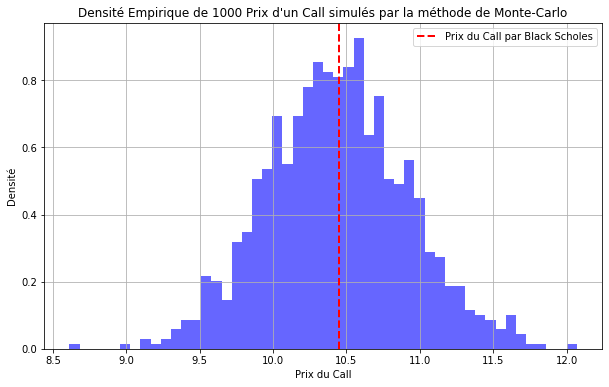

In [83]:
plt.figure(figsize=(10, 6))
plt.hist(multiple_simulations, bins=50, density=True, alpha=0.6, color='b')
plt.xlabel("Prix du Call")
plt.ylabel("Densité")
plt.axvline(black_scholes([S0],K,T,r,sigma), color='r', linewidth=2, linestyle='--', label = "Prix du Call par Black Scholes")
plt.title("Densité Empirique de 1000 Prix d'un Call simulés par la méthode de Monte-Carlo")
plt.grid(True)
plt.legend()
plt.show()

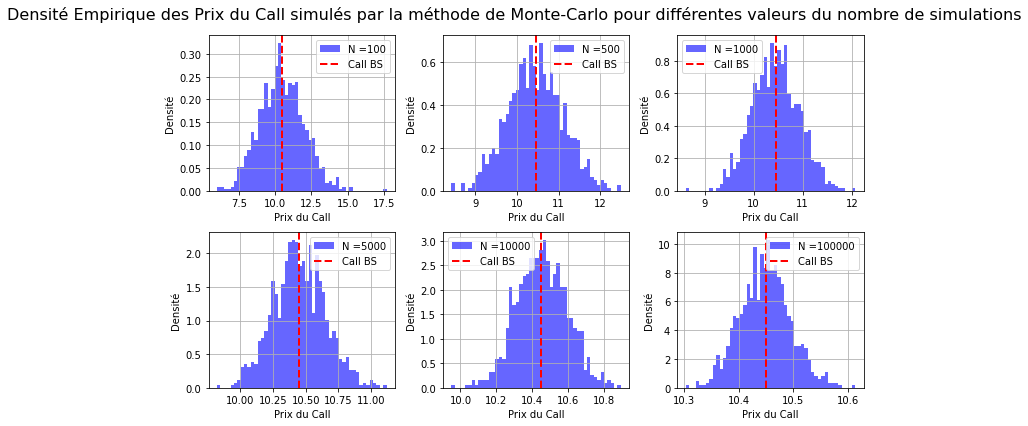

In [88]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()
N = [100, 500, 1000, 5000, 10000, 100000]

multiple_simulations = []
np.random.seed(42)
for i in range(len(N)):
  multiple_simulation = []
  for j in range(nb_prix):
    multiple_simulation.append(Monte_Carlo_BS(S0,K,T,r,sigma,N[i])[0])
  multiple_simulations.append(multiple_simulation)

for i in range(len(N)):
  axes[i].hist(multiple_simulations[i], bins=50, density=True, alpha=0.6, color='b', label=f"N ={N[i]}")
  axes[i].axvline(black_scholes([S0],K,T,r,sigma), color='r', linewidth=2, linestyle='--', label = "Call BS")
  axes[i].set_xlabel("Prix du Call")
  axes[i].set_ylabel("Densité")
  axes[i].grid(True)
  axes[i].legend()

fig.suptitle("Densité Empirique des Prix du Call simulés par la méthode de Monte-Carlo pour différentes valeurs du nombre de simulations", fontsize=16)
plt.tight_layout()
plt.legend()
plt.show()

Nous avons donc affiché la distribution des prix calculés par Monte Carlo. Nous avons affiché une ligne verticale pour indiquer le prix théorique de Black Scholes. On remarque que plus le nombre de simulations augmente et plus les prix de Monte Carlo se rapprochent et se concentrent autour du prix de Black Scholes (puisque l'échelle sur l'axe des abscisses devient de plus en plus précise). Donc le résultat des simulations converge bien vers le prix théorique. 

5. Nous allons maintenant mesurer le temps de calcul moyen d'un prix Monte Carlo à N = $10^6$ simulations avec notre code. 

In [89]:
%%timeit
N = 10**6
Monte_Carlo_BS(S0, K, T, r, sigma, N)

405 ms ± 5.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Notre code met donc 4,05 secondes à calculer $10^6$ simulations de prix de Monte Carlo. 